<a href="https://colab.research.google.com/github/oussemajelassi/embedded_ReinforcementLearning/blob/main/RL_Pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -m pip install gymnasium==0.28.1
!python -m pip install stable-baselines3[extra]==2.1.0
!python -m pip install ax-platform==0.3.4
!python -m pip install wandb==0.15.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 7.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.7 MB/s eta 0:00:00
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446660 sha256=80005720412965347fe880bb616840714608634fdb03a01a6d00e4a9255bcf71
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.8/567.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [22]:
import gymnasium as gim
import stable_baselines3 as sb3
import cv2
import matplotlib.pyplot as plt
from stable_baselines3.common.callbacks import BaseCallback
import time


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[-0.83352536  0.5524812  -0.73249876] {}


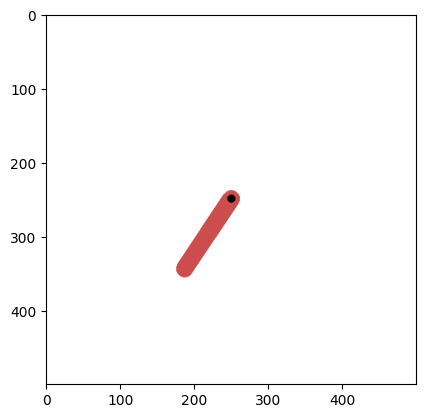

In [6]:
# Create the environment and test it :

env = gim.make('Pendulum-v1', render_mode = 'rgb_array')
obs,info = env.reset()
print (obs , info )
Frame = env.render()
plt.imshow (Frame)

In [7]:
# Video Recorder

def AddFrameToVideo (Frame , video ) :
  Frame = cv2.cvtColor(Frame , cv2.COLOR_RGB2BGR )
  video.write (Frame)


In [19]:
# Test the Environment

def RL_PendulumTest ( env , model , video ) :

  pend_TotalReward = 0
  pend_ellapsedTime = 0
  action = model.predict ( env.observation_space )
  TimeStamp = time.time()
  while True :
    action = model.predict ( env.observation_space )
    observations, rewards, termination, truncation, infos = env.step ( action )
    if video :
      AddFrameToVideo ( env.render() , video )
    pend_TotalReward += rewards
    pend_ellapsedTime = time.time() - TimeStamp

    if (pend_ellapsedTime > 60 ) or ( truncation ) or ( termination ) :
      break
  print (pend_TotalReward , pend_ellapsedTime)
  return pend_TotalReward , pend_ellapsedTime




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# Test the Environment

class DummyModel :
  def __init__ (self , env) :
    self.env = env
  def predict (self , obs ) :
    return ( self.env.action_space.sample() )

FPS = 30
size = (Frame.shape[1] , Frame.shape[0] )
EnvironmentVideo = cv2.VideoWriter("sequence.mp4",cv2.VideoWriter_fourcc('m','p','4','v'), FPS, size)
FlookiTestModel = DummyModel (env)
for counter in range (100) :
   RL_Reward , RL_length = RL_PendulumTest(env , FlookiTestModel , EnvironmentVideo )

EnvironmentVideo.release()


-8.759206166011074 0.013086557388305664
-10.136293591562026 0.009998798370361328
-11.886295388772599 0.009753227233886719
-11.390850046664454 0.009623527526855469
-10.057128943762992 0.009575366973876953
-8.434201999933245 0.009219646453857422
-6.761622657427501 0.010297298431396484
-5.6269509776551265 0.009731054306030273
-4.535120199076515 0.010195016860961914
-3.752722143182692 0.012979984283447266
-3.119398182915191 0.009855031967163086
-2.7872525712583927 0.00927734375
-2.594039810317881 0.009622812271118164
-2.6426572603215344 0.009419918060302734
-2.8197591456625335 0.010431051254272461
-3.171626090774143 0.008217573165893555
-3.7019783817586673 0.009608745574951172
-4.758141383021096 0.009406805038452148
-6.147594061411639 0.009706974029541016
-7.418607923939577 0.010059356689453125
-9.411688937394379 0.010979413986206055
-11.22954533061519 0.008532285690307617
-12.569379866252723 0.008609533309936523
-11.073884972669665 0.009609699249267578
-9.386095312781483 0.010226964950561

## Callbacks Function

In [ ]:
class PendulumEnvCallback(BaseCallback):
    """
    A custom callback that derives from ``BaseCallback``.

    :param verbose: Verbosity level: 0 for no output, 1 for info messages, 2 for debug messages
    """
    def __init__(self,
                 check_freq,
                 save_dir,
                 model_name="model",
                 replay_buffer_name=None,
                 steps_per_test=0,
                 num_tests=10,
                 step_offset = 0,
                 verbose: int = 1):
      super(PendulumEnvCallback,self).__init__(verbose)
      self.check_freq = check_freq
      self.save_dir = save_dir
      self.model_name = model_name
      self.replay_buffer_name = replay_buffer_name
      self.steps_per_test = steps_per_test
      self.num_tests = num_tests
      self.step_offset = step_offset

    def _on_training_start(self) -> None:
        """
        This method is called before the first rollout starts.
        """
        pass

    def _on_rollout_start(self) -> None:
        """
        A rollout is the collection of environment interaction
        using the current policy.
        This event is triggered before collecting new samples.
        """
        pass

    def _on_step(self) -> bool:
        """
        This method will be called by the model after each call to `env.step()`.

        For child callback (of an `EventCallback`), this will be called
        when the event is triggered.

        :return: If the callback returns False, training is aborted early.
        """

        return True

    def _on_rollout_end(self) -> None:
        """
        This event is triggered before updating the policy.
        """
        pass

    def _on_training_end(self) -> None:
        """
        This event is triggered before exiting the `learn()` method.
        """
        pass